In [44]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Loading the regression dataset(employee payroll)
df = pd.read_csv("https://media.githubusercontent.com/media/SakibUzZaman99/CSE445-ML/refs/heads/main/City%20Employee%20Payroll%20Current.csv?fbclid=IwY2xjawIcaApleHRuA2FlbQIxMAABHS60RVi7buZBPWeFaQCezArIOgemFKQC_vfrGhkzXagZ2Zrf6BEk6_VDhw_aem_dlIfOmLYkodQU5yF2MEsPw",
          dtype={0: str, 10: str})  # Replace col 1 & 10 with str as they've mixed data types

#prints first 6 rows
df.head(6)

,RECORD_NBR,PAY_YEAR,LAST_NAME,FIRST_NAME,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_CLASS_PGRADE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,...,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY,ROW_ID
0,303030303233,2017,ESCOBEDO,JOSE,70,POLICE,2214-2,POLICE OFFICER II,FULL_TIME,ACTIVE,...,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,5835.35,2241.75,99703.95,27042.10,16819.00,MALE,HISPANIC,17303030303233702214-2FT
1,3030303032,2017,VILLEGAS,JOSE,44,LIBRARY,1172-1,LIBRARY ASSISTANT I,FULL_TIME,ACTIVE,...,CLERICAL,65332.56,0.00,0.00,65332.56,19377.64,7528.44,MALE,HISPANIC,173030303032441172-1FT
2,303030303433,2017,LIPSCOMB,PAUL,42,HARBOR,0801-1,PORT WARDEN I,FULL_TIME,NOT_ACTIVE,...,LOS ANGELES PORT POLICE COMMAND OFFICERS,184110.40,0.00,1750.00,185860.40,86255.72,6518.28,MALE,CAUCASIAN,17303030303433420801-1FT
3,3030303035,2017,BAUTISTA,RONALD,88,RECREATION AND PARKS,3141-0,GARDENER CARETAKER,FULL_TIME,ACTIVE,...,EQUIPMENT OPERATION AND LABOR,55628.80,2129.02,200.00,57957.82,16499.50,14946.17,MALE,HISPANIC,173030303035883141-0FT
4,3030303037,2017,NUNEZ,ANGELICA,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,9191-1,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,FULL_TIME,ACTIVE,...,TECHNICAL,132912.00,0.00,350.00,133262.00,39421.70,6446.75,FEMALE,HISPANIC,173030303037229191-1FT
5,303030303933,2017,PERRY,BRETT,82,PUBLIC WORKS - SANITATION,7871-1,ENVIRONMENTAL ENGINEERING ASSOCIATE I,FULL_TIME,NOT_ACTIVE,...,PROFESSIONAL ENGINEERING AND SCIENTIFIC,22838.40,0.00,150.00,22988.40,6773.87,2243.03,MALE,CAUCASIAN,17303030303933827871-1FT


In [46]:
#no. of rows & columns
df.shape

(554302, 21)

In [47]:
#Print all the data types and their unique values & its quantity
for column in df.columns:
    print(f"Data Type: {df[column].dtype}") #data type
    print(f"{df[column].nunique()} types of unique values")  # Count of unique values
    print(df[column].value_counts())        #how many sample/value of that one particular unique value
    print()

Data Type: object
106288 types of unique values
RECORD_NBR
343635313833      20
3438323333        19
393432353833      19
363934353333      18
3130333837        18
                  ..
WP393338303135     1
WP393338393038     1
WP393339303438     1
WP393431313939     1
WP393431353138     1
Name: count, Length: 106288, dtype: int64

Data Type: int64
8 types of unique values
PAY_YEAR
2018    78663
2019    74019
2017    72415
2020    71843
2023    70833
2022    68946
2021    65585
2024    51998
Name: count, dtype: int64

Data Type: object
31854 types of unique values
LAST_NAME
GARCIA        5476
RODRIGUEZ     4815
LOPEZ         4652
HERNANDEZ     4594
MARTINEZ      4360
              ... 
GALABOV          1
BIELANSKI        1
SIA-FERRER       1
ESCOBAR JR       1
GRINNER          1
Name: count, Length: 31854, dtype: int64

Data Type: object
16666 types of unique values
FIRST_NAME
MICHAEL       10008
DAVID          8442
JOSE           6970
ROBERT         6471
JOHN           6318
           

In [48]:
#Checking if there's any missing values
df.isnull().sum()

,0
RECORD_NBR,0
PAY_YEAR,0
LAST_NAME,13
FIRST_NAME,0
DEPARTMENT_NO,0
DEPARTMENT_TITLE,0
JOB_CLASS_PGRADE,232
JOB_TITLE,232
EMPLOYMENT_TYPE,0
JOB_STATUS,0


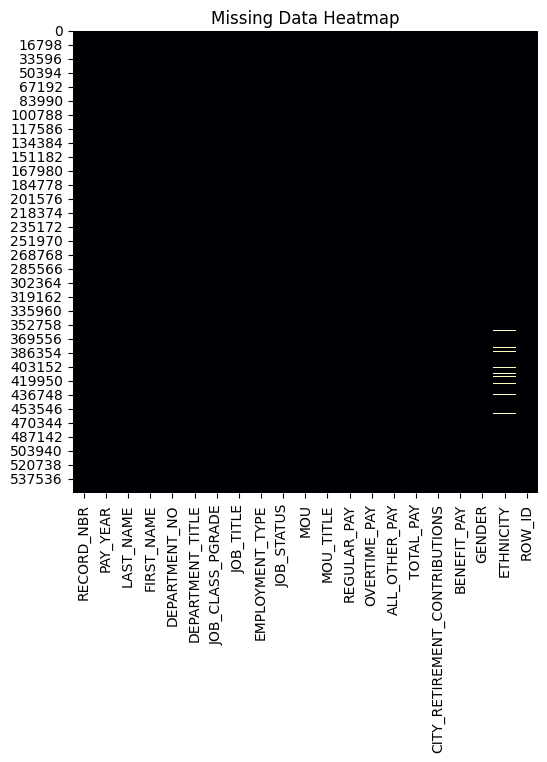

In [49]:
#Visual representation of missing data
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.title('Missing Data Heatmap')
plt.show()

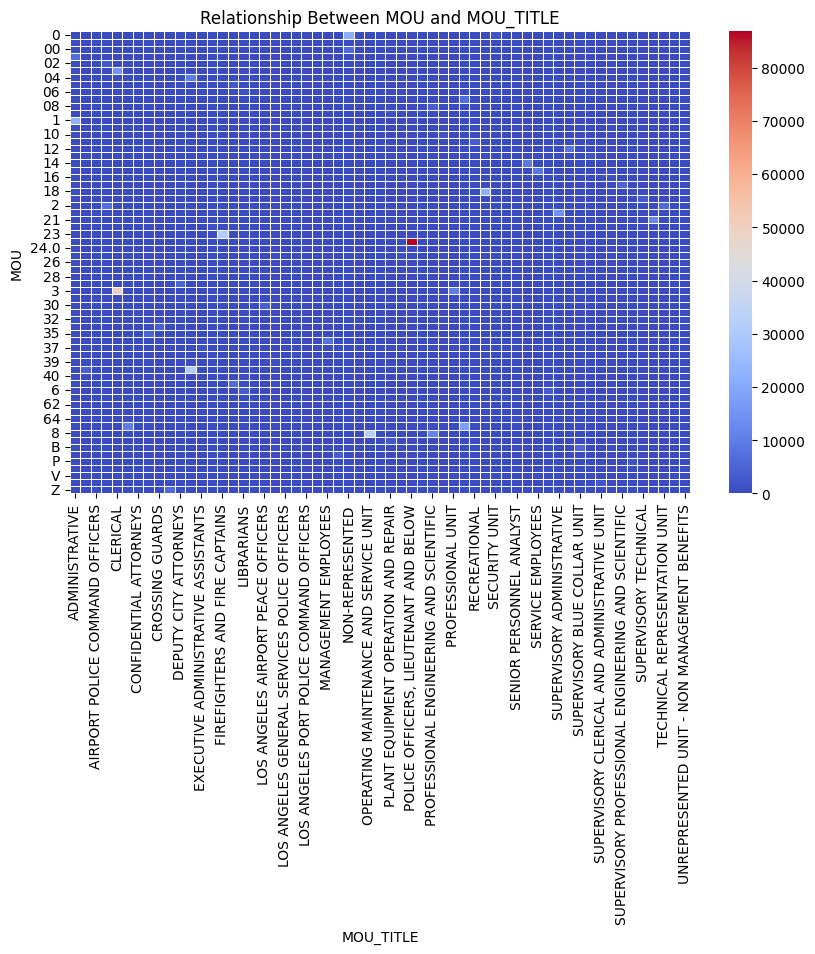

In [50]:
#Just a Relationship Between MOU and MOU_TITLE
#Create a crosstab (frequency table)
crosstab = pd.crosstab(df["MOU"], df["MOU_TITLE"])

# Plot as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Relationship Between MOU and MOU_TITLE")
plt.xlabel("MOU_TITLE")
plt.ylabel("MOU")
plt.xticks(rotation=90)
plt.show()

In [51]:
df_dropped = df.copy() # Create a copy of df and assign it to df_dropped
#DROPPING AS THEY DON'T CONTRIBUTE

df_dropped = df_dropped.drop(columns=['FIRST_NAME', 'LAST_NAME', 'ROW_ID',
                                       'JOB_CLASS_PGRADE', 'MOU'])

#dropping the 1 row where gender column has a missing value
df_dropped = df_dropped.dropna(subset=['GENDER'])

#no. of rows & columns AGAIN
df_dropped.shape

(554301, 16)

In [52]:
#to check new dataset with dropped column(printing first 6 rows)
df_dropped.head(6)

,RECORD_NBR,PAY_YEAR,DEPARTMENT_NO,DEPARTMENT_TITLE,JOB_TITLE,EMPLOYMENT_TYPE,JOB_STATUS,MOU_TITLE,REGULAR_PAY,OVERTIME_PAY,ALL_OTHER_PAY,TOTAL_PAY,CITY_RETIREMENT_CONTRIBUTIONS,BENEFIT_PAY,GENDER,ETHNICITY
0,303030303233,2017,70,POLICE,POLICE OFFICER II,FULL_TIME,ACTIVE,"POLICE OFFICERS, LIEUTENANT AND BELOW",91626.85,5835.35,2241.75,99703.95,27042.10,16819.00,MALE,HISPANIC
1,3030303032,2017,44,LIBRARY,LIBRARY ASSISTANT I,FULL_TIME,ACTIVE,CLERICAL,65332.56,0.00,0.00,65332.56,19377.64,7528.44,MALE,HISPANIC
2,303030303433,2017,42,HARBOR,PORT WARDEN I,FULL_TIME,NOT_ACTIVE,LOS ANGELES PORT POLICE COMMAND OFFICERS,184110.40,0.00,1750.00,185860.40,86255.72,6518.28,MALE,CAUCASIAN
3,3030303035,2017,88,RECREATION AND PARKS,GARDENER CARETAKER,FULL_TIME,ACTIVE,EQUIPMENT OPERATION AND LABOR,55628.80,2129.02,200.00,57957.82,16499.50,14946.17,MALE,HISPANIC
4,3030303037,2017,22,ECONOMIC AND WORKFORCE DEVELOPMENT DEPARTMENT,INDUSTRIAL COMMERCIAL FINANCE OFFICER I,FULL_TIME,ACTIVE,TECHNICAL,132912.00,0.00,350.00,133262.00,39421.70,6446.75,FEMALE,HISPANIC
5,303030303933,2017,82,PUBLIC WORKS - SANITATION,ENVIRONMENTAL ENGINEERING ASSOCIATE I,FULL_TIME,NOT_ACTIVE,PROFESSIONAL ENGINEERING AND SCIENTIFIC,22838.40,0.00,150.00,22988.40,6773.87,2243.03,MALE,CAUCASIAN


In [53]:
#Filling missing values with unknown since these columns are categorical
df_dropped['JOB_TITLE'] = df['JOB_TITLE'].fillna('Unknown')
df_dropped['MOU_TITLE'] = df['MOU_TITLE'].fillna('Unknown')
df_dropped['ETHNICITY'] = df['ETHNICITY'].fillna('Unknown')

<ipython-input-53-b5130c99ecac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['JOB_TITLE'] = df['JOB_TITLE'].fillna('Unknown')
<ipython-input-53-b5130c99ecac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['MOU_TITLE'] = df['MOU_TITLE'].fillna('Unknown')
<ipython-input-53-b5130c99ecac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [54]:
#Converting categorical to numerical values bcz some models need numerical inputs to process them
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df_dropped.select_dtypes(include=['object']).columns:
    df_dropped[col] = encoder.fit_transform(df_dropped[col])

In [55]:
#Standardizing numerical values(Feature Scaling)
#We chose Standardization (Z-score Normalization) bcz it transforms data to have mean=0 & std.dev=1 & good for ML models
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = df_dropped.select_dtypes(include=[np.number]).columns # Select numerical columns from df_dropped
df_dropped[numeric_cols] = scaler.fit_transform(df_dropped[numeric_cols]) # Standardize df_dropped

In [56]:
#Checking AGAIN if there's any missing values
df_dropped.isnull().sum()

,0
RECORD_NBR,0
PAY_YEAR,0
DEPARTMENT_NO,0
DEPARTMENT_TITLE,0
JOB_TITLE,0
EMPLOYMENT_TYPE,0
JOB_STATUS,0
MOU_TITLE,0
REGULAR_PAY,0
OVERTIME_PAY,0


In [57]:
print(df_dropped.describe())

         RECORD_NBR      PAY_YEAR  DEPARTMENT_NO  DEPARTMENT_TITLE  \
count  5.543010e+05  5.543010e+05   5.543010e+05      5.543010e+05   
mean  -5.250546e-17  2.343713e-14  -3.937910e-17      1.296229e-16   
std    1.000001e+00  1.000001e+00   1.000001e+00      1.000001e+00   
min   -1.726732e+00 -1.476691e+00  -2.148419e+00     -2.359783e+00   
25%   -8.677021e-01 -1.031420e+00  -8.558187e-01     -6.066625e-01   
50%   -2.547476e-03 -1.408790e-01   1.646555e-01      2.374324e-01   
75%    8.615590e-01  7.496624e-01   7.769401e-01      7.568754e-01   
max    1.754654e+00  1.640204e+00   1.117098e+00      1.081527e+00   

          JOB_TITLE  EMPLOYMENT_TYPE    JOB_STATUS     MOU_TITLE  \
count  5.543010e+05     5.543010e+05  5.543010e+05  5.543010e+05   
mean   1.410059e-16    -3.363631e-17 -3.158532e-17  6.563183e-18   
std    1.000001e+00     1.000001e+00  1.000001e+00  1.000001e+00   
min   -2.019545e+00    -4.725736e-01 -6.441213e-01 -1.527058e+00   
25%   -7.419588e-01    -4.725

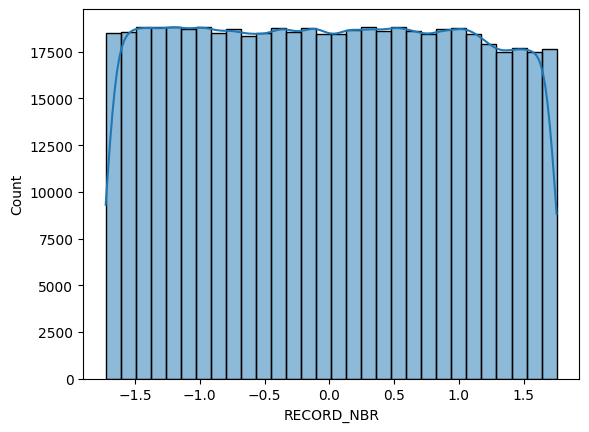

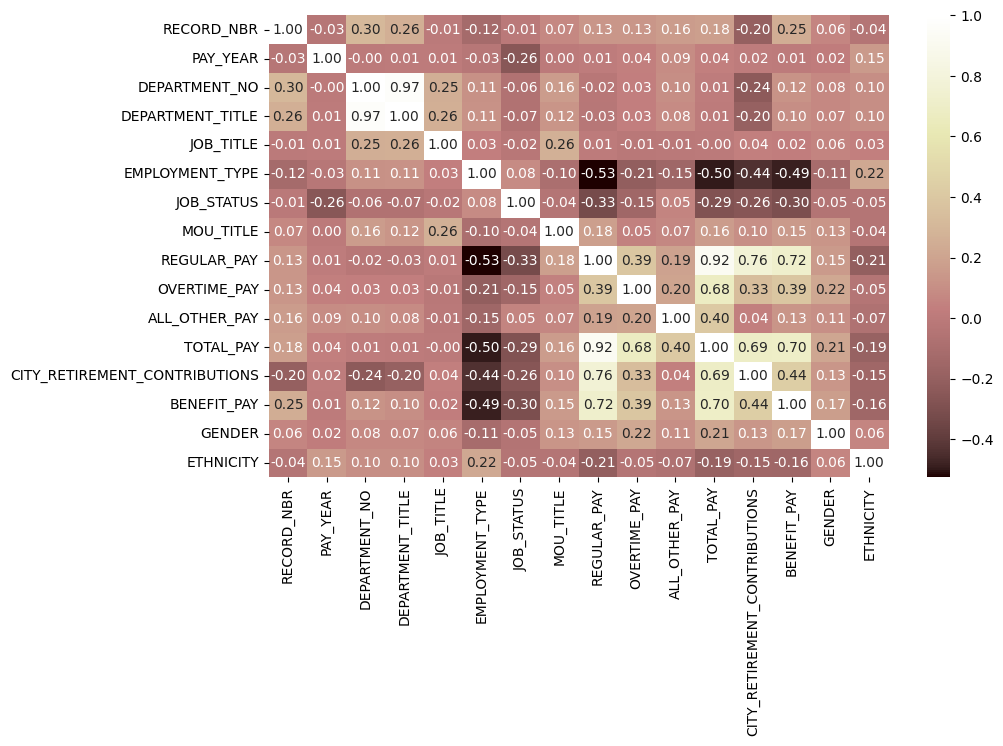

In [58]:
# Distribution of a numeric column
sns.histplot(df_dropped[numeric_cols[0]], bins=30, kde=True)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_dropped.corr(), annot=True, cmap='pink', fmt='.2f')
plt.show()

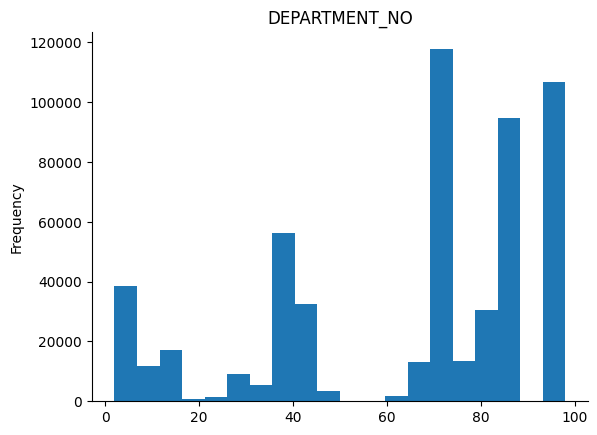

In [59]:
from matplotlib import pyplot as plt
df['DEPARTMENT_NO'].plot(kind='hist', bins=20, title='DEPARTMENT_NO')
plt.gca().spines[['top', 'right',]].set_visible(False)

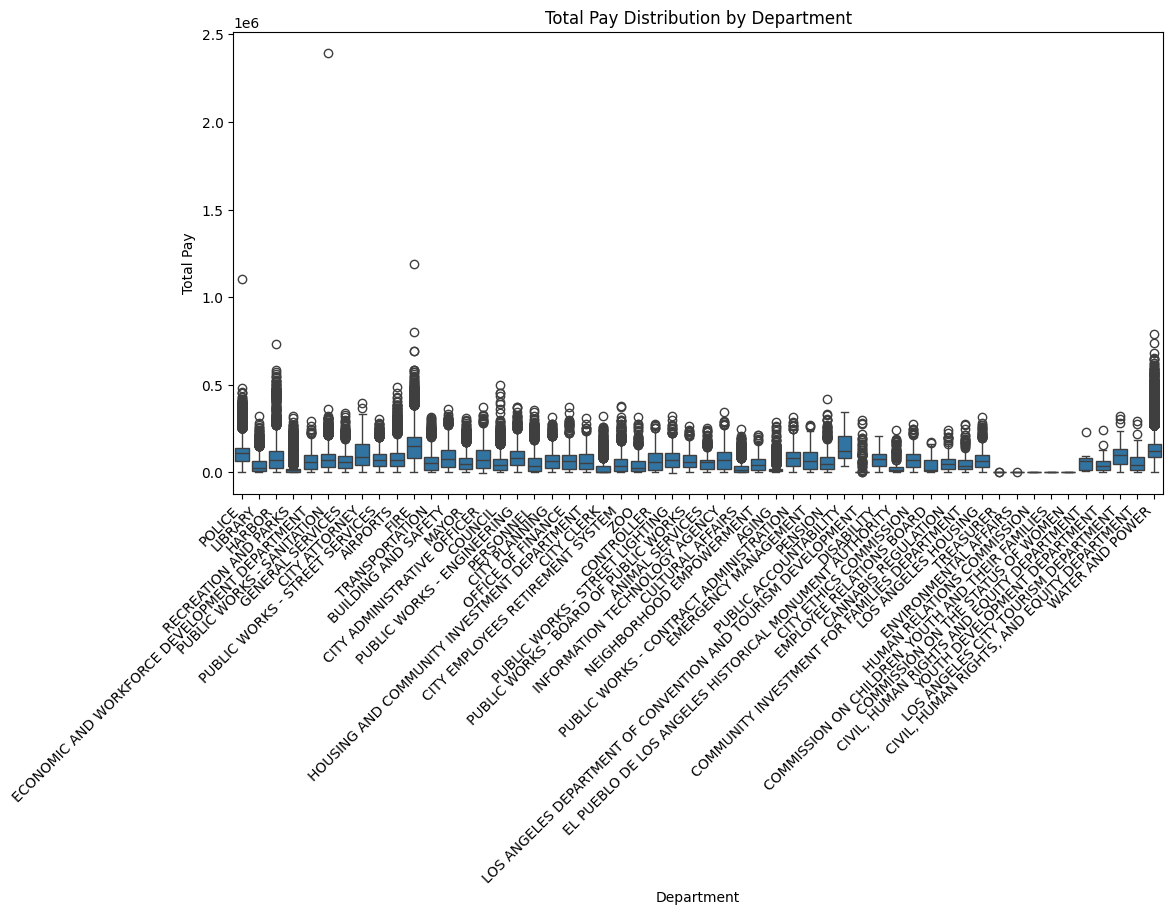

In [60]:
# Visualization: Box Plot of Total Pay by Department
plt.figure(figsize=(12, 6))
sns.boxplot(x='DEPARTMENT_TITLE', y='TOTAL_PAY', data=df)
plt.title('Total Pay Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()

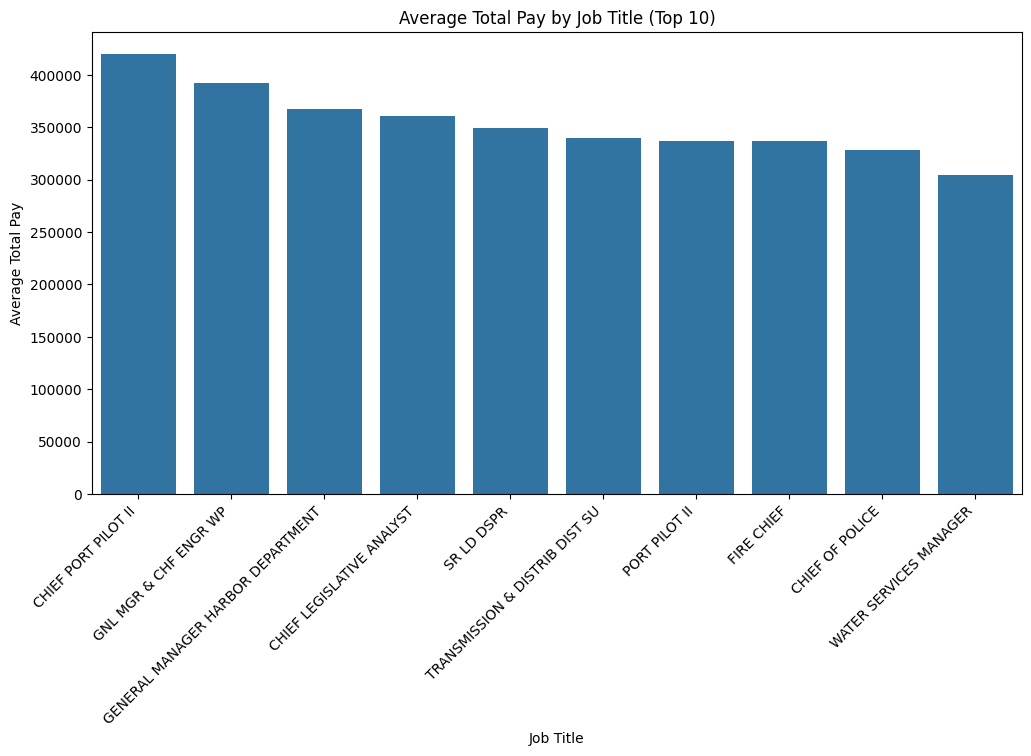

In [61]:
# Visualization: Bar plot of average total pay by job title (top 10)
avg_pay_by_job = df.groupby('JOB_TITLE')['TOTAL_PAY'].mean().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='JOB_TITLE', y='TOTAL_PAY', data=avg_pay_by_job)
plt.title('Average Total Pay by Job Title (Top 10)')
plt.xlabel('Job Title')
plt.ylabel('Average Total Pay')
plt.xticks(rotation=45, ha='right')
plt.show()

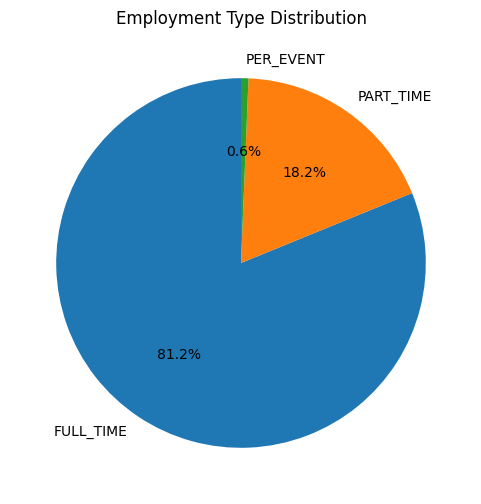

In [62]:
# Visualization: Pie chart of Employment Type distribution
employment_type_counts = df['EMPLOYMENT_TYPE'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(employment_type_counts, labels=employment_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employment Type Distribution')
plt.show()

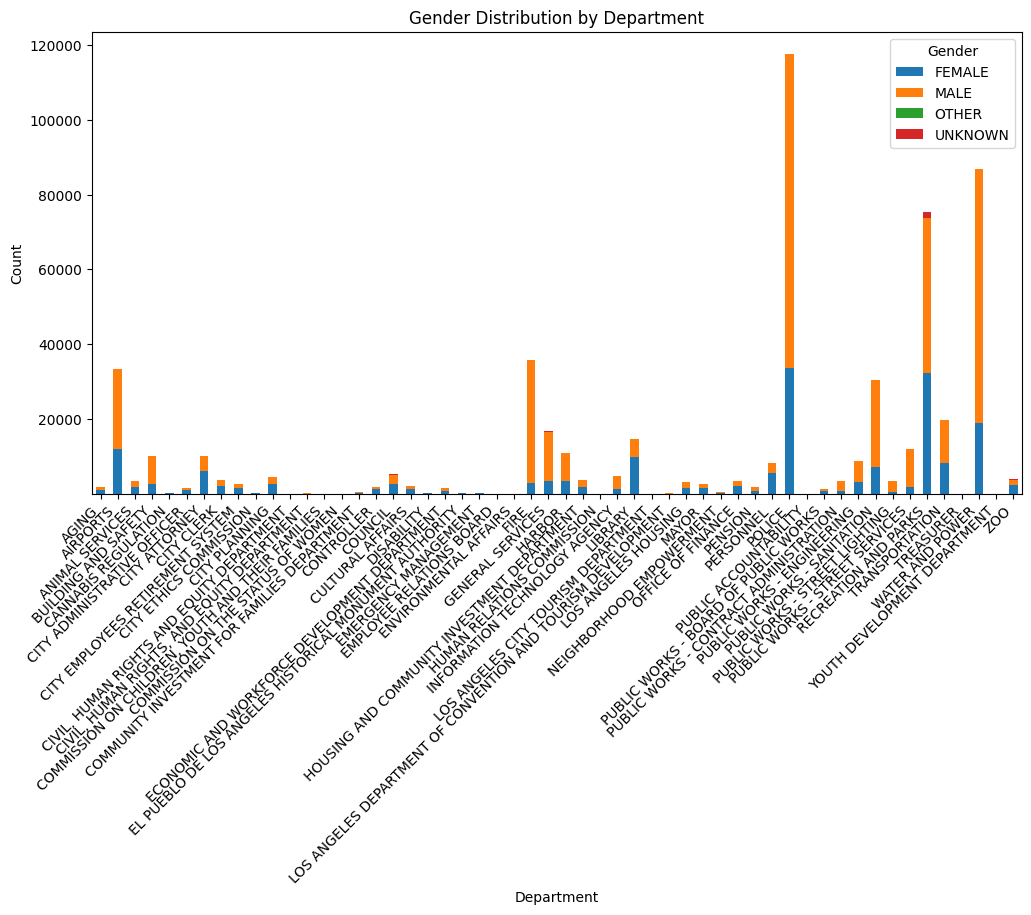

In [63]:
# Visualization: Stacked bar chart of Gender distribution by Department
department_gender_counts = pd.crosstab(df['DEPARTMENT_TITLE'], df['GENDER'])
department_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.show()

In [64]:
# from sklearn.model_selection import train_test_split

# df_a, df_b = train_test_split(df, test_size = 0.0001, random_state = 42)
# df = df_b

# df

In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [66]:
# Prepare the data for modeling
X = df_dropped.drop('TOTAL_PAY', axis=1)  # creates a new DataFrame called X that has all columns from df_dropped except 'TOTAL_PAY'
y = df_dropped['TOTAL_PAY']  # Target variable ('TOTAL_PAY')  (a single column of data) called y that contains only the 'TOTAL_PAY' values

In [67]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #random state 42 bcz we get same split across diff. runs

In [68]:
# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # model learns from the data & fit function adjusts the model's parameters to find the best linear relationship between features & total pay
y_pred_linear = linear_model.predict(X_test) # to make predictions on the test data (X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)  # measures the avg squared diff btwn actual total pay (y_test) & predicted total pay (y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear) #  represents proportion of variance in the target variable; higher R-squared value (closer to 1) indicates better accuracy

print("Linear Regression:")
print(f"Mean Squared Error: {mse_linear}") # Gives an idea of the avg error in the predictions
print(f"R-squared: {r2_linear}")  # coefficient of determination

Linear Regression:
Mean Squared Error: 1.7524158027019372e-30
R-squared: 1.0


In [69]:
# 2. Logistic regression not applicable for regression problem

In [70]:
# # 3. Random Forest
# forest_model = RandomForestRegressor(random_state=42, n_estimators=10) # n_estimators=10 specifies the model will use 10 decision trees, more tree = better performance but increases time
# forest_model = RandomForestRegressor(max_depth=7, random_state=42)
# forest_model = RandomForestRegressor(max_features='sqrt', random_state=42)  # Considered the sqrt of the total no. of features
# forest_model = RandomForestRegressor(n_jobs=-1, random_state=42)  # Using all available CPU cores
# forest_model.fit(X_train, y_train) # fit function used to train model
# y_pred_forest = forest_model.predict(X_test)
# mse_forest = mean_squared_error(y_test, y_pred_forest)
# r2_forest = r2_score(y_test, y_pred_forest)

# print("\nRandom Forest Regression:")
# print(f"Mean Squared Error: {mse_forest}")
# print(f"R-squared: {r2_forest}") # (closer to 1) indicates better accuracy

In [71]:
!pip install xgboost # python package xgboost

In [72]:
# 4. XGBoost
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=100) # objective='reg:squarederror' indicate that we're using it for regression with the goal of minimizing the squared error
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regression:")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")


XGBoost Regression:
Mean Squared Error: 0.0028740414348782566
R-squared: 0.9971575942489135


In [73]:
# 5. Decision Tree Regression (Neural Network)
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


print("\nDecision Tree Regression:")
print(f"Mean Squared Error: {mse_tree}")
print(f"R-squared: {r2_tree}")


Decision Tree Regression:
Mean Squared Error: 0.0010910081310888011
R-squared: 0.9989210010166676


In [74]:
# 6. KNN Regression
knn_model = KNeighborsRegressor(n_neighbors=3) # n_neighbors=3 means the model will consider the 3 nearest neighbors when making predictions
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN Regression:")
print(f"Mean Squared Error: {mse_knn}")
print(f"R-squared: {r2_knn}")


KNN Regression:
Mean Squared Error: 0.011852116263959342
R-squared: 0.9882783445560691


Hyperparameter Tuning

In [75]:
!pip install scikit-optimize

In [76]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

In [77]:
# # Bayesian Optimization for Linear Regression using cross validation

# # Define the search space for hyperparameters
# search_spaces = { # dictionary defining the range of values the optimization algorithm will explore for each hyperparameter
#     'fit_intercept': [True, False], #  hyperparameter that determines whether the model should calculate an intercept for the regression line
#     'copy_X': [True, False] # hyperparameter that controls whether the input data (X) is copied before fitting the model
# }

# # Create a Bayesian Optimization object
# opt = BayesSearchCV( # function from the skopt library
#     LinearRegression(),
#     search_spaces,
#     n_iter=16,  # Number of iterations(attempts) the optimization algorithm will make
#     cv=3,   # Number of cross-validation folds; Cross-validation helps to ensure that the model generalizes well to unseen data
#     scoring='neg_mean_squared_error',  # using negative MSE as the scoring metric which tries to minimize the negative of the Mean Squared Error
#     random_state=42,
#     verbose=1, # Controls the amount of output printed during the optimization process
#     n_jobs=-1 #  Sets the number of CPU cores to use (-1 means use all available cores)
# )


# # Perform Bayesian Optimization
# opt.fit(X_train, y_train)

# # Print the best hyperparameters and score
# print("Best hyperparameters:", opt.best_params_)
# print("Best score:", opt.best_score_)

# # Evaluate the model with the best hyperparameters on the test set
# y_pred_bayes = opt.predict(X_test)
# mse_bayes = mean_squared_error(y_test, y_pred_bayes)
# r2_bayes = r2_score(y_test, y_pred_bayes)

# print("\nBayesian Optimization:")
# print(f"Mean Squared Error: {mse_bayes}")
# print(f"R-squared: {r2_bayes}")

In [78]:
# Bayesian Optimization for XGBoost using cross validation

# Define the search space for hyperparameters
xgb_search_spaces = {
    'n_estimators': Integer(5, 9),
    'max_depth': Integer(3, 7),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    # 'min_child_weight': Integer(1, 10)
}

# Create a Bayesian Optimization object for XGBoost
xgb_opt = BayesSearchCV(
    xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    xgb_search_spaces,
    n_iter=6,  # Number of iterations
    cv=3,      # Number of cross-validation folds
    n_jobs=-1,  # Used all available CPU cores
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    verbose=1
)

# Perform Bayesian Optimization for XGBoost
xgb_opt.fit(X_train, y_train)

# Print the best hyperparameters and score for XGBoost
print("\nXGBoost Bayesian Optimization:")
print("Best hyperparameters:", xgb_opt.best_params_)
print("Best score:", xgb_opt.best_score_)

# Evaluate the XGBoost model with the best hyperparameters on the test set
y_pred_xgb_bayes = xgb_opt.predict(X_test)
mse_xgb_bayes = mean_squared_error(y_test, y_pred_xgb_bayes)
r2_xgb_bayes = r2_score(y_test, y_pred_xgb_bayes)

print("\nXGBoost Bayesian Optimization - Test Set:")
print(f"Mean Squared Error: {mse_xgb_bayes}")
print(f"R-squared: {r2_xgb_bayes}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits

XGBoost Bayesian Optimization:
Best hyperparameters: Or

In [ ]:
# Bayesian Optimization for KNN using cross validation

# Define the search space for hyperparameters
knn_search_spaces = {
    'n_neighbors': Integer(1, 5),
    'weights': ['uniform', 'distance'],
    'p': Integer(1, 3)
}

# Create a Bayesian Optimization object for KNN
knn_opt = BayesSearchCV(
    KNeighborsRegressor(),
    knn_search_spaces,
    n_iter=6,  # No. of iterations
    cv=3,      # No. of cross-validation folds
    n_jobs=-1,  # Using all available CPU cores
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    random_state=42,
    verbose=1
)

# Perform Bayesian Optimization for KNN
knn_opt.fit(X_train, y_train)

# Print the best hyperparameters and score for KNN
print("\nKNN Bayesian Optimization:")
print("Best hyperparameters:", knn_opt.best_params_)
print("Best score:", knn_opt.best_score_)

# Evaluate the KNN model with the best hyperparameters on the test set
y_pred_knn_bayes = knn_opt.predict(X_test)
mse_knn_bayes = mean_squared_error(y_test, y_pred_knn_bayes)
r2_knn_bayes = r2_score(y_test, y_pred_knn_bayes)

print("\nKNN Bayesian Optimization - Test Set:")
print(f"Mean Squared Error: {mse_knn_bayes}")
print(f"R-squared: {r2_knn_bayes}")

In [ ]:
# Bayesian Optimization for Decision Tree using cross validation

# Define the search space for hyperparameters
dt_search_spaces = {
    'max_depth': Integer(5, 10),
    'min_samples_split': Integer(2, 5),
    'min_samples_leaf': Integer(1, 4),
    'max_features': ['sqrt', 'log2'],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error']
}

# Create a Bayesian Optimization object for Decision Tree
dt_opt = BayesSearchCV(
    DecisionTreeRegressor(random_state=42),
    dt_search_spaces,
    n_iter=2,  # no. of iterations
    cv=3,      # no. of cross-validation folds
    n_jobs=-1,  # Used all available CPU cores
    scoring='neg_mean_squared_error',  # negative MSE as the scoring metric
    random_state=42,
    verbose=1
)

# Perform Bayesian Optimization for Decision Tree
dt_opt.fit(X_train, y_train)

# Print the best hyperparameters and score for Decision Tree
print("\nDecision Tree Bayesian Optimization:")
print("Best hyperparameters:", dt_opt.best_params_)
print("Best score:", dt_opt.best_score_)

# Evaluate the Decision Tree model with the best hyperparameters on the test set
y_pred_dt_bayes = dt_opt.predict(X_test)
mse_dt_bayes = mean_squared_error(y_test, y_pred_dt_bayes)
r2_dt_bayes = r2_score(y_test, y_pred_dt_bayes)

print("\nDecision Tree Bayesian Optimization - Test Set:")
print(f"Mean Squared Error: {mse_dt_bayes}")
print(f"R-squared: {r2_dt_bayes}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for linear regression
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

# Create a linear regression model
linear_model = LinearRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(linear_model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
y_pred_grid = grid_search.predict(X_test)
mse_grid = mean_squared_error(y_test, y_pred_grid)
r2_grid = r2_score(y_test, y_pred_grid)

print("\nGrid Search:")
print(f"Mean Squared Error: {mse_grid}")
print(f"R-squared: {r2_grid}")

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [3, 7],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'min_child_weight': [1, 5, 10]
}

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create GridSearchCV object for XGBoost
halving_grid_search_xgb = HalvingGridSearchCV(xgb_model, param_grid_xgb, factor=3, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1) # factor controls the proportion of candidates kept in each iteration

# Fit the GridSearchCV object to the data
halving_grid_search_xgb.fit(X_train, y_train,
                            fit_params={'eval_metric':'rmse',
                                        'early_stopping_rounds':10,
                                        'eval_set': [(X_test, y_test)]})

# Print the best hyperparameters and score for XGBoost
print("\nXGBoost Halving Grid Search:")
print("Best hyperparameters:", halving_grid_search_xgb.best_params_)
print("Best score:", halving_grid_search_xgb.best_score_)

# Evaluate the XGBoost model with the best hyperparameters on the test set
y_pred_xgb_grid = halving_grid_search_xgb.predict(X_test)
mse_xgb_grid = mean_squared_error(y_test, y_pred_xgb_grid)
r2_xgb_grid = r2_score(y_test, y_pred_xgb_grid)

print("\nXGBoost Grid Search - Test Set:")
print(f"Mean Squared Error: {mse_xgb_grid}")
print(f"R-squared: {r2_xgb_grid}")

In [ ]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 31, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'criterion':['squared_error', 'friedman_mse']
}

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Create GridSearchCV object for Decision Tree
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_search_dt.fit(X_train, y_train)

# Print the best hyperparameters and score for Decision Tree
print("\nDecision Tree Grid Search:")
print("Best hyperparameters:", grid_search_dt.best_params_)
print("Best score:", grid_search_dt.best_score_)

# Evaluate the Decision Tree model with the best hyperparameters on the test set
y_pred_dt_grid = grid_search_dt.predict(X_test)
mse_dt_grid = mean_squared_error(y_test, y_pred_dt_grid)
r2_dt_grid = r2_score(y_test, y_pred_dt_grid)

print("\nDecision Tree Grid Search - Test Set:")
print(f"Mean Squared Error: {mse_dt_grid}")
print(f"R-squared: {r2_dt_grid}")

In [ ]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create a KNN Regressor model
knn_model = KNeighborsRegressor()

# Create GridSearchCV object for KNN
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and score for KNN
print("\nKNN Grid Search:")
print("Best hyperparameters:", grid_search_knn.best_params_)
print("Best score:", grid_search_knn.best_score_)

# Evaluate the KNN model with the best hyperparameters on the test set
y_pred_knn_grid = grid_search_knn.predict(X_test)
mse_knn_grid = mean_squared_error(y_test, y_pred_knn_grid)
r2_knn_grid = r2_score(y_test, y_pred_knn_grid)

print("\nKNN Grid Search - Test Set:")
print(f"Mean Squared Error: {mse_knn_grid}")
print(f"R-squared: {r2_knn_grid}")

In [ ]:
# random search for linear regression
# Define the parameter distribution for Linear Regression
param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

# Create a Linear Regression model
linear_model = LinearRegression()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(linear_model, param_dist, n_iter=10, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and score
print("\nLinear Regression Randomized Search:")
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate the model with the best hyperparameters on the test set
y_pred_random = random_search.predict(X_test)
mse_random = mean_squared_error(y_test, y_pred_random)
r2_random = r2_score(y_test, y_pred_random)

print("\nLinear Regression Randomized Search - Test Set:")
print(f"Mean Squared Error: {mse_random}")
print(f"R-squared: {r2_random}")

In [ ]:
# Define the parameter distribution for XGBoost for random search

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
param_dist_xgb = {
    'n_estimators': np.arange(50, 151, 10),
    'max_depth': np.arange(3, 7),
    'learning_rate': np.linspace(0.01, 0.3),
    'subsample': np.linspace(0.5, 1.0),
    'min_child_weight': np.arange(1, 10)
}

# Create an XGBoost Regressor model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create RandomizedSearchCV object for XGBoost
random_search_xgb = HalvingRandomSearchCV(xgb_model, param_dist_xgb, n_candidates='exhaust', factor=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_xgb.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_test, y_test)], eval_metric='rmse')

# Print the best hyperparameters and score for XGBoost
print("\nXGBoost Randomized Search:")
print("Best hyperparameters:", random_search_xgb.best_params_)
print("Best score:", random_search_xgb.best_score_)

# Evaluate the XGBoost model with the best hyperparameters on the test set
y_pred_xgb_random = random_search_xgb.predict(X_test)
mse_xgb_random = mean_squared_error(y_test, y_pred_xgb_random)
r2_xgb_random = r2_score(y_test, y_pred_xgb_random)

print("\nXGBoost Randomized Search - Test Set:")
print(f"Mean Squared Error: {mse_xgb_random}")
print(f"R-squared: {r2_xgb_random}")

In [ ]:
#random search for knn
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for KNN
knn_param_dist = {
    'n_neighbors': np.arange(1, 7),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

# Create a KNN Regressor model
knn_model = KNeighborsRegressor()

# Create RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(knn_model, knn_param_dist, n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_knn.fit(X_train, y_train)

# Print the best hyperparameters and score for KNN
print("\nKNN Randomized Search:")
print("Best hyperparameters:", random_search_knn.best_params_)
print("Best score:", random_search_knn.best_score_)

# Evaluate the KNN model with the best hyperparameters on the test set
y_pred_knn_random = random_search_knn.predict(X_test)
mse_knn_random = mean_squared_error(y_test, y_pred_knn_random)
r2_knn_random = r2_score(y_test, y_pred_knn_random)

print("\nKNN Randomized Search - Test Set:")
print(f"Mean Squared Error: {mse_knn_random}")
print(f"R-squared: {r2_knn_random}")

In [ ]:
# Bayesian Optimization for Random Forest using cross validation

# Define the search space for hyperparameters
rf_search_spaces = {
    'n_estimators': Integer(10, 20), # Represents the no. of decision trees in the forest (between 10 & 20)
    'max_depth': Integer(10, 25), # Limits the maximum depth of each tree (between 10 and 25)
    'min_samples_split': Integer(2, 10),
    'min_samples_leaf': Integer(1, 4), #  Sets the minimum no. of samples required to be at a leaf node (between 1 & 4)
}

# Create a Bayesian Optimization object for Random Forest
rf_opt = BayesSearchCV(
    RandomForestRegressor(random_state=42),
    rf_search_spaces,
    n_iter=6,  # Number of iterations; The optimization algorithm will try 6 different combinations of hyperparameters
    cv=3,      # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    scoring='neg_mean_squared_error',  # Use negative MSE as the scoring metric
    random_state=42,
    verbose=1
)

# Perform Bayesian Optimization for Random Forest
rf_opt.fit(X_train, y_train)

# Print the best hyperparameters and score for Random Forest
print("\nRandom Forest Bayesian Optimization:")
print("Best hyperparameters:", rf_opt.best_params_)
print("Best score:", rf_opt.best_score_)

# Evaluate the Random Forest model with the best hyperparameters on the test set
y_pred_rf_bayes = rf_opt.predict(X_test)
mse_rf_bayes = mean_squared_error(y_test, y_pred_rf_bayes)
r2_rf_bayes = r2_score(y_test, y_pred_rf_bayes)

print("\nRandom Forest Bayesian Optimization - Test Set:")
print(f"Mean Squared Error: {mse_rf_bayes}")
print(f"R-squared: {r2_rf_bayes}")

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [5, 10, 15],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object for Random Forest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and score for Random Forest
print("\nRandom Forest Grid Search:")
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Best score:", grid_search_rf.best_score_)

# Evaluate the Random Forest model with the best hyperparameters on the test set
y_pred_rf_grid = grid_search_rf.predict(X_test)
mse_rf_grid = mean_squared_error(y_test, y_pred_rf_grid)
r2_rf_grid = r2_score(y_test, y_pred_rf_grid)

print("\nRandom Forest Grid Search - Test Set:")
print(f"Mean Squared Error: {mse_rf_grid}")
print(f"R-squared: {r2_rf_grid}")

In [ ]:
# Random Search for Decision tree using cross validation

# Define the parameter distribution for Decision Tree for random search
param_dist_dt = {
    'max_depth': np.arange(10, 15),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Create RandomizedSearchCV object for Decision Tree
random_search_dt = RandomizedSearchCV(dt_model, param_dist_dt, n_iter=4, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_dt.fit(X_train, y_train)

# Print the best hyperparameters and score for Decision Tree
print("\nDecision Tree Randomized Search:")
print("Best hyperparameters:", random_search_dt.best_params_)
print("Best score:", random_search_dt.best_score_)

# Evaluate the Decision Tree model with the best hyperparameters on the test set
y_pred_dt_random = random_search_dt.predict(X_test)
mse_dt_random = mean_squared_error(y_test, y_pred_dt_random)
r2_dt_random = r2_score(y_test, y_pred_dt_random)

print("\nDecision Tree Randomized Search - Test Set:")
print(f"Mean Squared Error: {mse_dt_random}")
print(f"R-squared: {r2_dt_random}")

In [ ]:
# Define the parameter distribution for Random Forest for random search
param_dist_rf = {
    'n_estimators': np.arange(10, 20, 10),
    'max_depth': [None, 10, 20],
    'min_samples_split': np.arange(2, 6),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object for Random Forest
random_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, n_iter=4, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1, random_state=42)

# Fit the RandomizedSearchCV object to the data
random_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and score for Random Forest
print("\nRandom Forest Randomized Search:")
print("Best hyperparameters:", random_search_rf.best_params_)
print("Best score:", random_search_rf.best_score_)

# Evaluate the Random Forest model with the best hyperparameters on the test set
y_pred_rf_random = random_search_rf.predict(X_test)
mse_rf_random = mean_squared_error(y_test, y_pred_rf_random)
r2_rf_random = r2_score(y_test, y_pred_rf_random)

print("\nRandom Forest Randomized Search - Test Set:")
print(f"Mean Squared Error: {mse_rf_random}")
print(f"R-squared: {r2_rf_random}")

In [ ]:
data = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Decision Tree', 'KNN'],
    'Grid Search MSE': [mse_grid, mse_rf_grid, mse_xgb_grid, mse_dt_grid, mse_knn_grid],
    'Grid Search R-squared': [r2_grid, r2_rf_grid, r2_xgb_grid, r2_dt_grid, r2_knn_grid],
    'Random Search MSE': [mse_random, mse_rf_random, mse_xgb_random, mse_dt_random, mse_knn_random],
    'Random Search R-squared': [r2_random, r2_rf_random, r2_xgb_random, r2_dt_random, r2_knn_random],
    'Bayesian Optimization MSE': [np.nan, mse_rf_bayes, mse_xgb_bayes, mse_dt_bayes, mse_knn_bayes],
    'Bayesian Optimization R-squared': [np.nan, r2_rf_bayes, r2_xgb_bayes, r2_dt_bayes, r2_knn_bayes]
}
results_df = pd.DataFrame(data)
results_df